## Thyroid Disease Prediction

In this Notebook, we will build a model to predict if a patient has thyroid disease or not based on various features. The user will be able to feed data to the model to get outcomes.

## Project Outline

### 1. Description

In this project, you will:

1. Understand and clean the data to ensure it's suitable for analysis and modeling.
2. Visualize the data to gain insights and create a dashboard for easy data interpretation.
3. Engineer features to improve the performance of the machine learning model.
4. Build and evaluate machine learning models to predict thyroid disease.
5. Deploy the final model using Streamlit for easy user interaction.

### 2. Features and Project Purpose

This data set contains 13 clinicopathologic features aiming to predict the recurrence of well-differentiated thyroid cancer. The data set was collected over a duration of 15 years, and each patient was followed for at least 10 years.

#### Source
The data was procured from thyroid disease datasets provided by the UCI Machine Learning Repository.

Sure! Below is a detailed description of each feature from the dataset, along with a concise summary.

## Features Declaration of Dataset
### Age
- **Description**: This feature represents the age of the patient at the time of diagnosis or treatment. Age is a critical factor in medical diagnoses, influencing treatment choices and prognostic outcomes.
- **Summary**: Age of the patient during diagnosis or treatment.

### Gender
- **Description**: This denotes the gender of the patient, categorized as male (M) or female (F). Gender differences can impact the incidence and progression of various diseases, including thyroid cancer.
- **Summary**: The gender of the patient (male or female).

### Smoking
- **Description**: Indicates whether the patient is currently a smoker. Smoking is a risk factor for many health conditions, including cancers and respiratory diseases.
- **Summary**: Current smoking status of the patient.

### Hx Smoking
- **Description**: Represents the patient's history of smoking. It indicates whether the patient has ever smoked in the past, which can have long-term health implications.
- **Summary**: History of smoking (ever smoked or not).

### Hx Radiotherapy
- **Description**: Indicates whether the patient has a history of receiving radiotherapy. Previous radiotherapy can affect the thyroid and surrounding tissues and has implications for cancer risk and treatment.
- **Summary**: History of radiotherapy treatment.

### Thyroid Function
- **Description**: Reflects the functional status of the thyroid gland, categorized as euthyroid (normal function), clinical hyperthyroidism (overactive), subclinical hypothyroidism (early stage of underactivity), clinical hypothyroidism (underactive), and subclinical hyperthyroidism (early stage of overactivity). Thyroid function affects metabolism and overall health.
- **Summary**: Status of thyroid gland function.

### Physical Examination
- **Description**: Findings from a clinical examination of the patient’s neck, specifically the thyroid gland. It includes various presentations such as multinodular goiter, single nodular goiter on the right or left, normal thyroid, or diffuse goiter. These findings help in assessing the thyroid's physical state.
- **Summary**: Physical examination results of the thyroid gland.

### Adenopathy
- **Description**: This feature denotes the presence and location of enlarged lymph nodes (adenopathy) in the neck, which can indicate infection, inflammation, or malignancy. It includes no adenopathy, and specific locations such as right, left, bilateral, extensive, and posterior.
- **Summary**: Presence and location of enlarged lymph nodes.

### Pathology
- **Description**: Represents the specific type of thyroid cancer diagnosed by pathology, including papillary (most common), micropapillary (small papillary), follicular (occurs in follicular cells), and Hurthle cell (rare and aggressive type in Hurthle cells). These types have different prognostic implications.
- **Summary**: Type of thyroid cancer based on pathology.

### Focality
- **Description**: Indicates whether the thyroid cancer is unifocal (limited to one location) or multifocal (present in multiple locations within the thyroid gland). This impacts treatment strategy and prognosis.
- **Summary**: Whether cancer is in one (unifocal) or multiple locations (multifocal).

### Risk
- **Description**: Categorizes the cancer into risk levels (low, intermediate, high) based on tumor size, extent of spread, and histological type. This helps guide treatment decisions and predict outcomes.
- **Summary**: Cancer risk category (low, intermediate, or high).

### T (Tumor Classification)
- **Description**: Represents the size and extent of the primary tumor. Categories include T1a, T1b, T2, T3a, T3b, T4a, and T4b, reflecting increasing tumor size and extent of invasion into nearby tissues. This is part of the TNM staging system.
- **Summary**: Classification of tumor size and extent of invasion.

### N (Nodal Classification)
- **Description**: Indicates lymph node involvement, with categories N0 (no nodes involved), N1a (regional nodes involved), and N1b (more extensive nodal involvement). This is crucial for staging and prognosis.
- **Summary**: Lymph node involvement status.

### M (Metastasis Classification)
- **Description**: Represents the presence or absence of distant metastasis, with M0 indicating no metastasis and M1 indicating the presence of metastasis. This is critical for staging and determining treatment approaches.
- **Summary**: Presence or absence of distant metastasis.

### Stage
- **Description**: Overall stage of the cancer, typically derived from the TNM classification system. Stages include I, II, III, IVA, and IVB, indicating increasing severity and extent of the disease.
- **Summary**: Overall cancer stage based on the TNM system.

### Response
- **Description**: Indicates the patient’s response to treatment, categorized as excellent, structural incomplete, indeterminate, and biochemical incomplete. This helps in monitoring treatment efficacy and planning further management.
- **Summary**: Patient's response to treatment.

### Recurred
- **Description**: Indicates whether the cancer has recurred after initial treatment, with categories Yes and No. Recurrence influences long-term management and prognosis.
- **Summary**: Whether the cancer has recurred after treatment.

Each feature provides valuable insights into the patient’s condition and helps in the overall assessment, diagnosis, and treatment planning for thyroid cancer.
## Let's Get Started!

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings

# Ignore all warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [4]:
for column in df.columns:
    unique_columns = df[column].value_counts()
    print("**************************************")
    print(f"Unique Values in {column} is: ")
    print(unique_columns)
    print("**************************************")

**************************************
Unique Values in Age is: 
Age
31    22
27    13
40    12
26    12
28    12
      ..
79     1
18     1
69     1
76     1
78     1
Name: count, Length: 65, dtype: int64
**************************************
**************************************
Unique Values in Gender is: 
Gender
F    312
M     71
Name: count, dtype: int64
**************************************
**************************************
Unique Values in Smoking is: 
Smoking
No     334
Yes     49
Name: count, dtype: int64
**************************************
**************************************
Unique Values in Hx Smoking is: 
Hx Smoking
No     355
Yes     28
Name: count, dtype: int64
**************************************
**************************************
Unique Values in Hx Radiothreapy is: 
Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64
**************************************
**************************************
Unique Values in Thyroid Function is: 
Thyro

In [5]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [6]:
df.duplicated().sum()

19

as we watched the Duplicates is unnessesary to delete or Replace it

# Data Preprocessing

In [7]:
def Convert_dtype(df, column_name):
    # Dictionary for conversion
    dict_ = {
        'Yes': True,
        'No': False
    }
    df[column_name] = df[column_name].apply(lambda x: dict_.get(x, x))
    
Convert_dtype(df, 'Smoking')
Convert_dtype(df, 'Hx Smoking')
Convert_dtype(df, 'Hx Radiothreapy')
Convert_dtype(df, 'Recurred')

In [8]:
def Convert_Gender(df, column_name):
    # Dictionary for conversion
    dict_ = {
        'F': 1,
        'M': 0
    }
    df[column_name] = df[column_name].apply(lambda x: dict_.get(x, x)).astype(int)
    
Convert_Gender(df, 'Gender')

In [9]:
# Rename the columns for better understanding
df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [10]:
df.describe(include='all')

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
count,383.000000,383.000000,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,NaN,NaN,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,NaN,NaN,False,False,False,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,False
freq,NaN,NaN,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275
mean,40.866841,0.814621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,15.134494,0.389113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,51.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Visualization

### 1. Age Distribution
To visualize the age distribution of patients in the dataset.

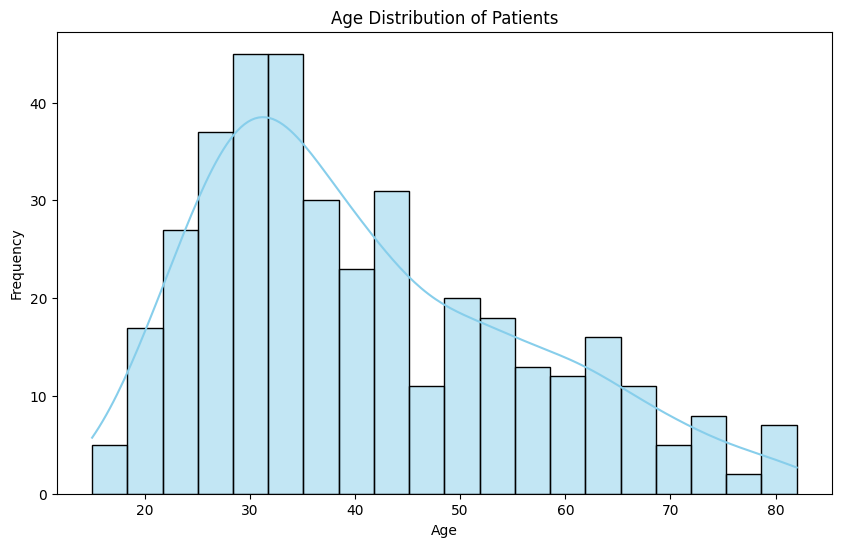

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2. Gender Distribution
To visualize the distribution of patients by gender.

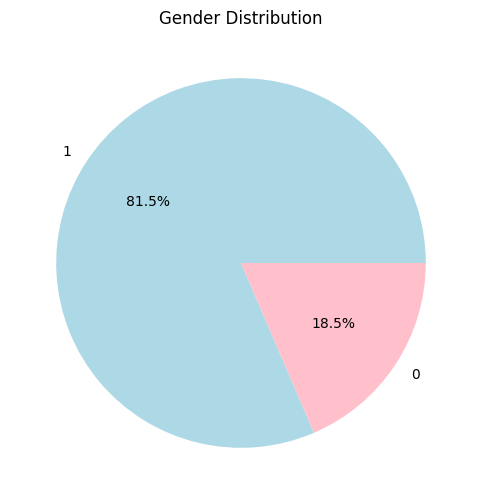

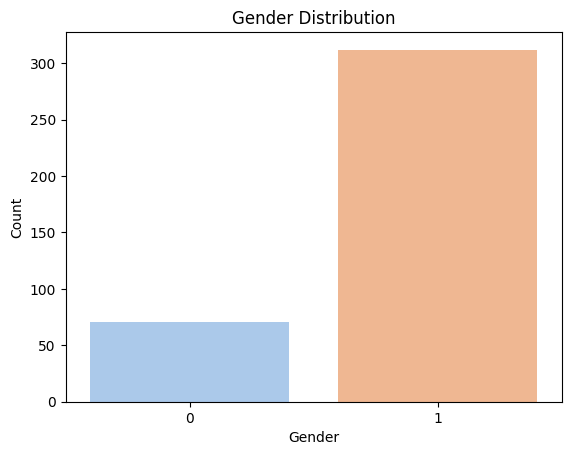

In [12]:
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Bar plot alternative
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 3. Smoking Status Impact
To compare the distribution of thyroid function status among smokers and non-smokers.

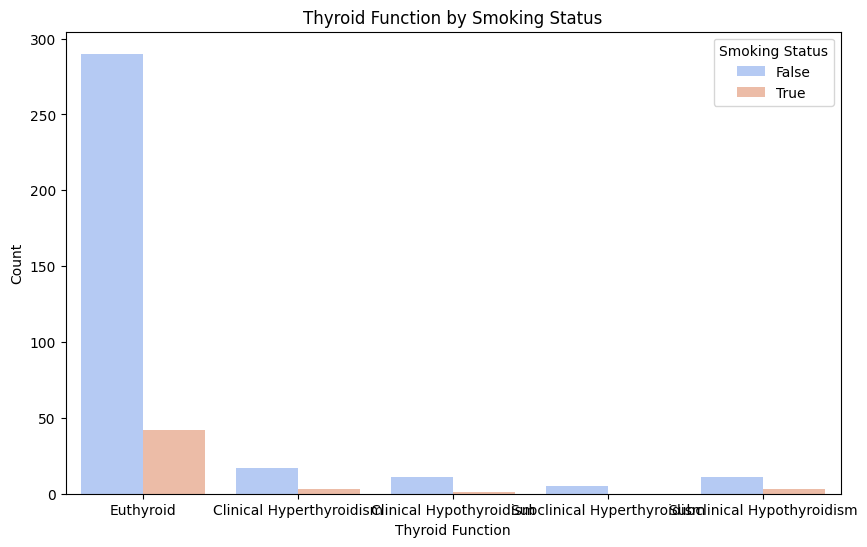

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Thyroid Function', hue='Smoking', data=df, palette='coolwarm')
plt.title('Thyroid Function by Smoking Status')
plt.xlabel('Thyroid Function')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

### 4. Thyroid Function and Age
To explore the relationship between age and thyroid function status.

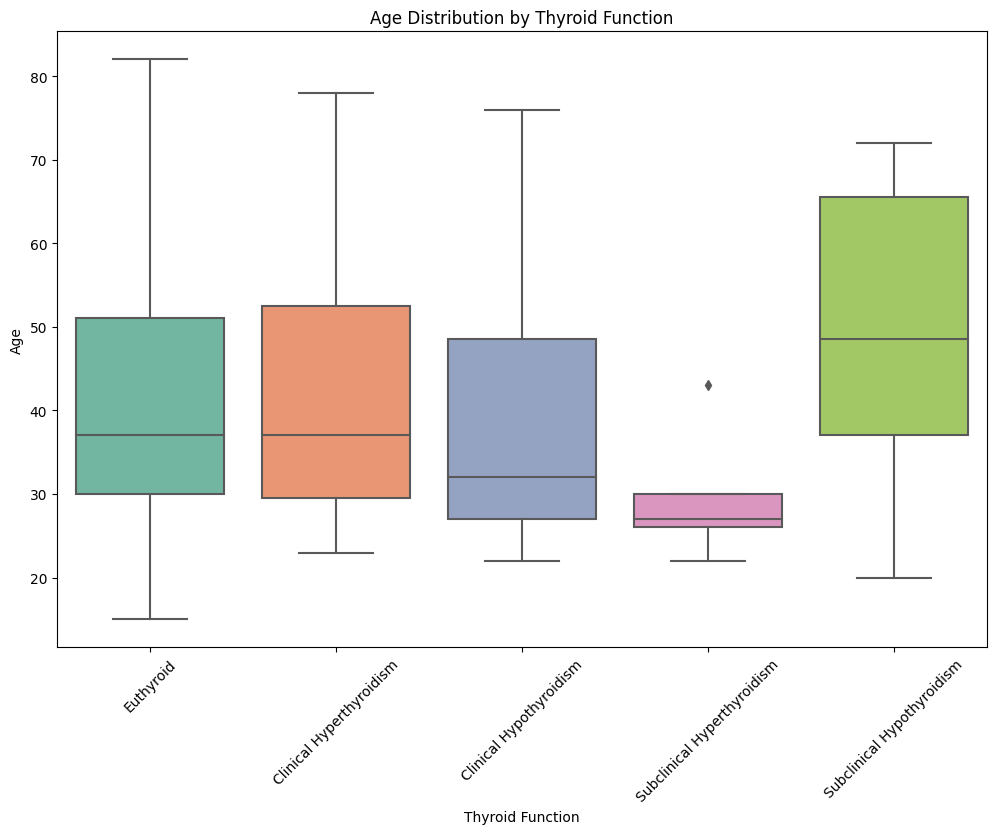

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Thyroid Function', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Thyroid Function')
plt.xlabel('Thyroid Function')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

### 5. Physical Examination Findings
To visualize the frequency of different physical examination findings.

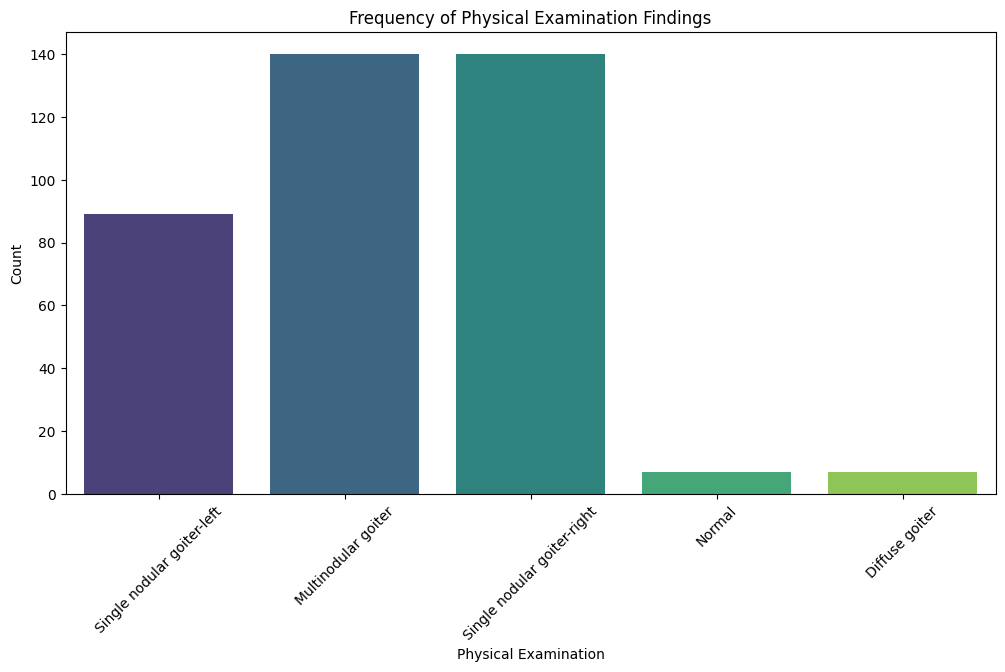

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Physical Examination', data=df, palette='viridis')
plt.title('Frequency of Physical Examination Findings')
plt.xlabel('Physical Examination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 6. Adenopathy and Thyroid Cancer Types
To investigate the relationship between adenopathy and types of thyroid cancer.

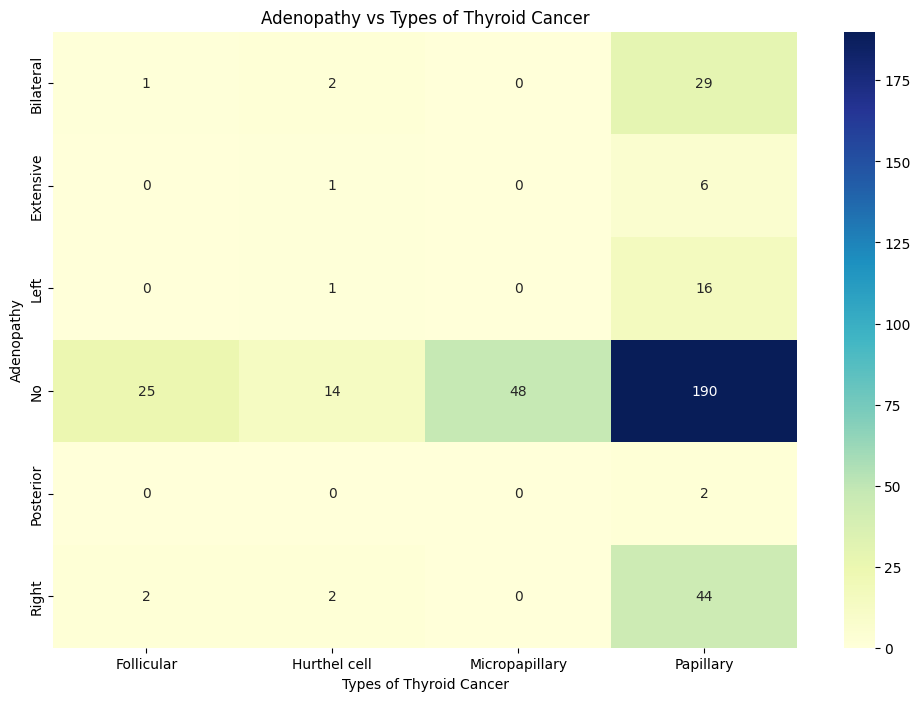

In [16]:
plt.figure(figsize=(12, 8))
heatmap_data = pd.crosstab(df['Adenopathy'], df['Types of Thyroid Cancer (Pathology)'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Adenopathy vs Types of Thyroid Cancer')
plt.xlabel('Types of Thyroid Cancer')
plt.ylabel('Adenopathy')
plt.show()

### 7. Cancer Stage Distribution
To visualize the distribution of different cancer stages.



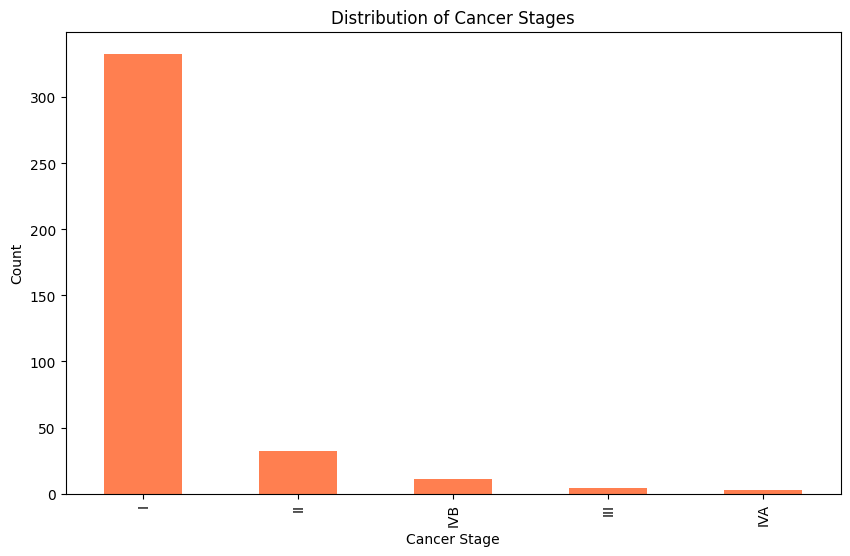

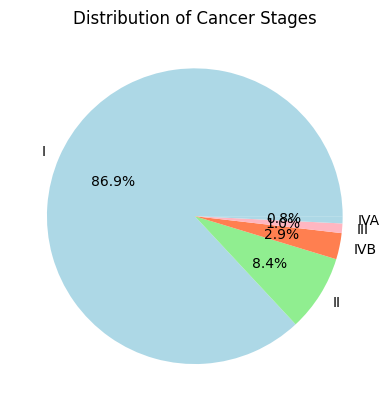

In [17]:
plt.figure(figsize=(10, 6))
df['Stage'].value_counts().plot(kind='bar', color='coral')
plt.title('Distribution of Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.show()

# Pie chart alternative
df['Stage'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'coral', 'lightpink'])
plt.title('Distribution of Cancer Stages')
plt.ylabel('')
plt.show()


### 8. Treatment Response Analysis
To analyze the distribution of treatment responses across different cancer stages.



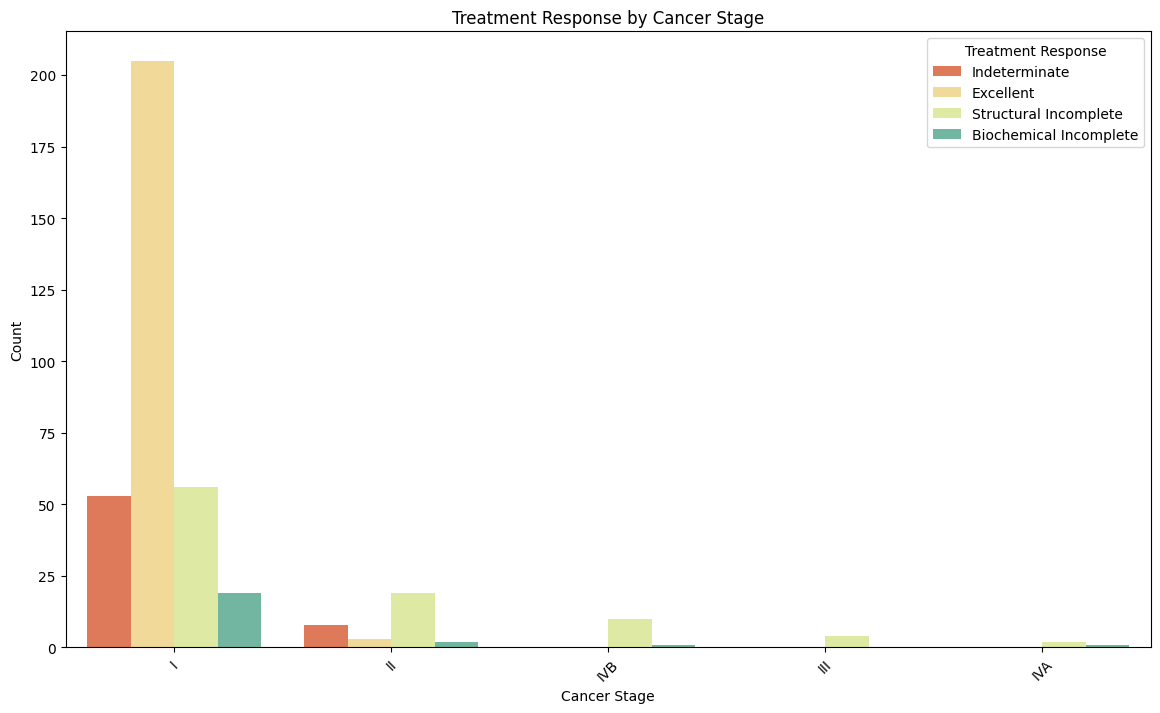

In [18]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Stage', hue='Treatment Response', data=df, palette='Spectral')
plt.title('Treatment Response by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.legend(title='Treatment Response')
plt.xticks(rotation=45)
plt.show()

### 9. Recurrence Analysis
To visualize the proportion of patients who experienced recurrence versus those who did not.



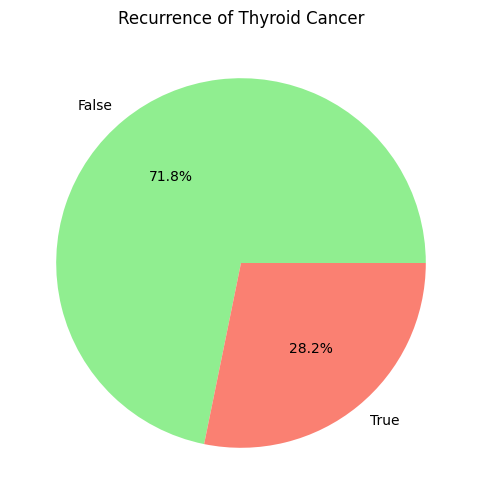

In [19]:
plt.figure(figsize=(8, 6))
df['Recurred'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Recurrence of Thyroid Cancer')
plt.ylabel('')
plt.show()

### 10. Risk Distribution by Cancer Type
To investigate the distribution of risk levels across different types of thyroid cancer.

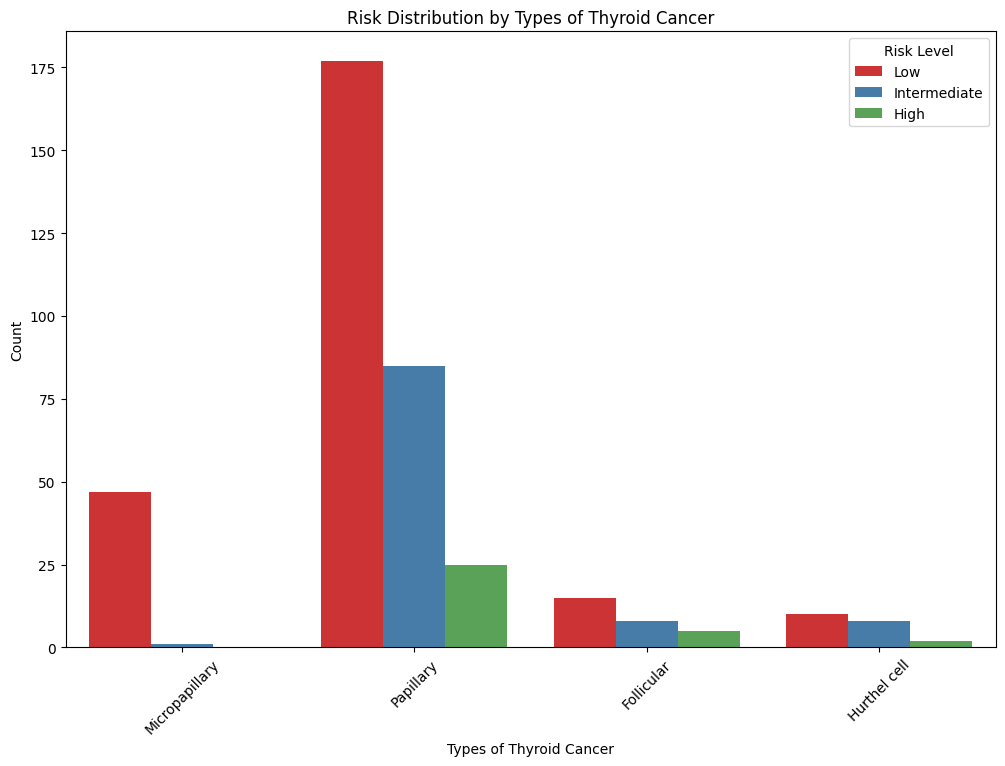

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Types of Thyroid Cancer (Pathology)', hue='Risk', data=df, palette='Set1')
plt.title('Risk Distribution by Types of Thyroid Cancer')
plt.xlabel('Types of Thyroid Cancer')
plt.ylabel('Count')
plt.legend(title='Risk Level')
plt.xticks(rotation=45)
plt.show()


In [21]:
df.to_csv('Thyroid_Disease.csv')

# Feature Engineering

In [24]:
# 1. Normalize Age
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

In [25]:
# 2. Encode binary variables
binary_features = ['Gender', 'Smoking', 'Smoking History', 'Radiotherapy History', 'Recurred']
for feature in binary_features:
    df[f'{feature}_encoded'] = df[feature].astype(int)

In [26]:
# 3. One-hot encode multiclass categorical variables
multiclass_features = ['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Types of Thyroid Cancer (Pathology)', 'Treatment Response']
df = pd.get_dummies(df, columns=multiclass_features, prefix=multiclass_features, drop_first=True)

In [27]:
# 4. Ordinal encoding for ordered categorical variables
ordinal_mappings = {
    'Focality': {'Uni-Focal': 0, 'Multi-Focal': 1},
    'Risk': {'Low': 0, 'Intermediate': 1, 'High': 2},
    'Tumor': {'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6},
    'Lymph Nodes': {'N0': 0, 'N1a': 1, 'N1b': 2},
    'Cancer Metastasis': {'M0': 0, 'M1': 1},
    'Stage': {'I': 0, 'II': 1, 'III': 2, 'IVA': 3, 'IVB': 4}
}

for feature, mapping in ordinal_mappings.items():
    df[f'{feature}_encoded'] = df[feature].map(mapping)

In [31]:
# 5. Drop original non-numeric columns
columns_to_drop = ['Age', 'Gender', 'Smoking', 'Smoking History', 'Radiotherapy History',
                    'Focality',
                   'Risk', 'Tumor', 'Lymph Nodes', 'Cancer Metastasis', 'Stage', 'Recurred']

df = df.drop(columns=columns_to_drop)

In [35]:
# Define features and target
X = df.drop(columns=['Recurred_encoded'])
y = df['Recurred_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selected features: ['Age_scaled', 'Gender_encoded', 'Physical Examination_Multinodular goiter', 'Adenopathy_No', 'Types of Thyroid Cancer (Pathology)_Papillary', 'Treatment Response_Excellent', 'Treatment Response_Indeterminate', 'Treatment Response_Structural Incomplete', 'Focality_encoded', 'Risk_encoded', 'Tumor_encoded', 'Lymph Nodes_encoded', 'Stage_encoded']


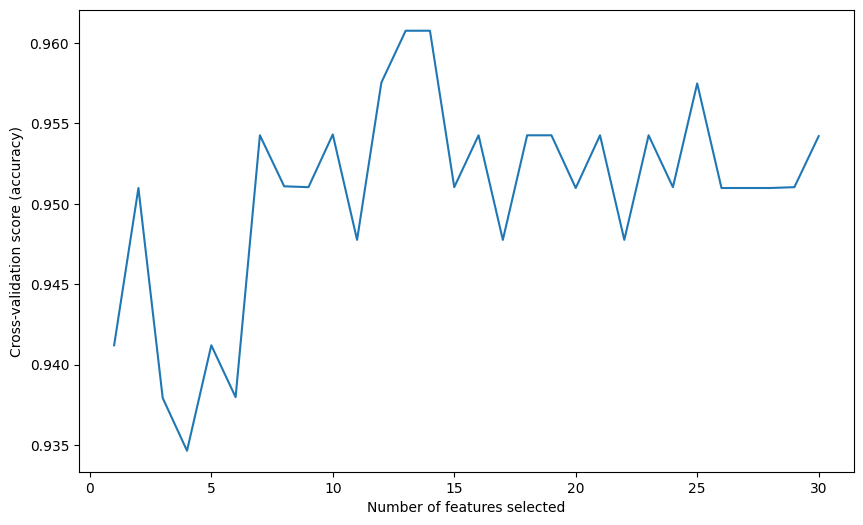

In [40]:
rf = RandomForestClassifier(random_state=42)

# Perform RFECV
selector = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]
print(f'Selected features: {selected_features.tolist()}')

# Extract cross-validation scores from `cv_results_`
cv_scores = selector.cv_results_['mean_test_score']

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(cv_scores) + 1), cv_scores)
plt.show()

# Reduce the dataset to the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [41]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_selected)

# Evaluate the model
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, rf_predictions)}')
print(f'Classification Report:\n{classification_report(y_test, rf_predictions)}')

Random Forest Accuracy: 0.987012987012987
Confusion Matrix:
[[58  0]
 [ 1 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In [42]:
# Initialize and train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test_selected)

# Evaluate the model
print(f'XGBoost Accuracy: {accuracy_score(y_test, xgb_predictions)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, xgb_predictions)}')
print(f'Classification Report:\n{classification_report(y_test, xgb_predictions)}')

XGBoost Accuracy: 0.974025974025974
Confusion Matrix:
[[58  0]
 [ 2 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77



In [45]:
# Save the trained Random Forest model
joblib_file = "random_forest_model.pkl"  
joblib.dump(rf_model, joblib_file)

print(f'Model saved as {joblib_file}')

['random_forest_model.pkl']

In [46]:
# Load the trained Random Forest model
loaded_rf_model = joblib.load('random_forest_model.pkl')

print('Model loaded successfully')

Model loaded successfully


In [50]:
new_data = pd.DataFrame({
    'Age_scaled': [0.25, 0.75, 0.35],  # Example scaled ages
    'Gender_encoded': [1, 0, 0],
    'Physical Examination_Multinodular goiter': [1, 0, 1],
    'Adenopathy_No': [1, 1, 0],
    'Types of Thyroid Cancer (Pathology)_Papillary': [1, 0, 1],
    'Treatment Response_Excellent': [0, 1, 0],
    'Treatment Response_Indeterminate': [1, 0, 0],
    'Treatment Response_Structural Incomplete': [0, 0, 1],
    'Focality_encoded': [0, 1, 2],
    'Risk_encoded': [1, 0, 2],
    'Tumor_encoded': [2, 1, 0],
    'Lymph Nodes_encoded': [0, 1, 0],
    'Stage_encoded': [1, 0, 1]
})

predictions = loaded_rf_model.predict(new_data)

# Output the predictions
print(f'Predictions: {predictions}')

Predictions: [0 0 1]
